In [1]:
import numpy as np
import torch
import os
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [2]:
os.getcwd()

'/dcs/22/u2202609/year_3/cs310/Project/Segmentation/notebook'

In [3]:
def dice_coef(output, target):
    smooth = 1e-5
    #output = torch.sigmoid(output).view(-1).data.cpu().numpy()
    output = output.view(-1).data.cpu().numpy()
    target = target.view(-1).data.cpu().numpy()
    intersection = (output * target).sum()
    

    return (2. * intersection + smooth) / \
        (output.sum() + target.sum() + smooth)

In [4]:
def my_dice(output, target):
    smooth = 1e-5
    output = torch.sigmoid(output).view(-1).data.cpu().numpy()
    #output = output.view(-1).data.cpu().numpy()
    target = target.view(-1).data.cpu().numpy()
    output_ = output > 0.5
    target_ = target > 0.5
    intersection = (output_ & target_).sum()
    

    return (2. * intersection + smooth) / \
        (output.sum() + target.sum() + smooth)

In [5]:
def my_iou(output,target):
    smooth = 1e-5
    output = output.view(-1).data.cpu().numpy()
    target = target.view(-1).data.cpu().numpy()
    intersection = (output * target).sum()
    

In [6]:
def iou_score(output, target):
    smooth = 1e-5

    if torch.is_tensor(output):
        output = output.data.cpu().numpy()
    if torch.is_tensor(target):
        target = target.data.cpu().numpy()
    output_ = output > 0.5
    target_ = target > 0.5
    intersection = (output_ & target_).sum()
    union = (output_ | target_).sum()

    return (intersection + smooth) / (union + smooth)

In [7]:
prediction_dir = '../model_outputs/NestedUNET_with_augmentation/Segmentation_output/NestedUNET_with_augmentation/'
# prediction_dir = '../Segmentation_output/NestedUNET_with_augmentation/'
actual_mask_dir = '../../Preprocessing/data/Mask/LIDC-IDRI-0015/0015_MA000_slice015.npy'


In [9]:
prediction = np.load(prediction_dir+'0015_PD000_slice015.npy')
mask = np.load(actual_mask_dir)

In [10]:
predict = torch.tensor(prediction)
mask = torch.tensor(mask)

In [11]:
np.unique(mask)

array([False,  True])

In [13]:
def view_img(prediction, mask):
    # Create the figure and subplots
    fig, ax = plt.subplots(1, 2, figsize=(15, 15))
    ax[0].title.set_text('Original Mask')
    ax[0].imshow(mask)
    ax[0].grid()

    ax[1].title.set_text('Prediction Mask')     
    ax[1].imshow(prediction)  # Use 'prediction' directly here
    ax[1].grid()
    plt.show()

    # Convert prediction and mask to tensors if not already
    predict = torch.tensor(prediction) if not isinstance(prediction, torch.Tensor) else prediction
    mask = torch.tensor(mask) if not isinstance(mask, torch.Tensor) else mask

    # Calculate metrics
    print("DICE COEFFICIENT IS", dice_coef(predict, mask))
    print("MY DICE COEFFICIENT IS", my_dice(predict, mask))
    print("IOU IS", iou_score(predict, mask))
    # Uncomment below if prediction contains logits
    # print("BCE LOSS IS", F.binary_cross_entropy_with_logits(predict, mask))


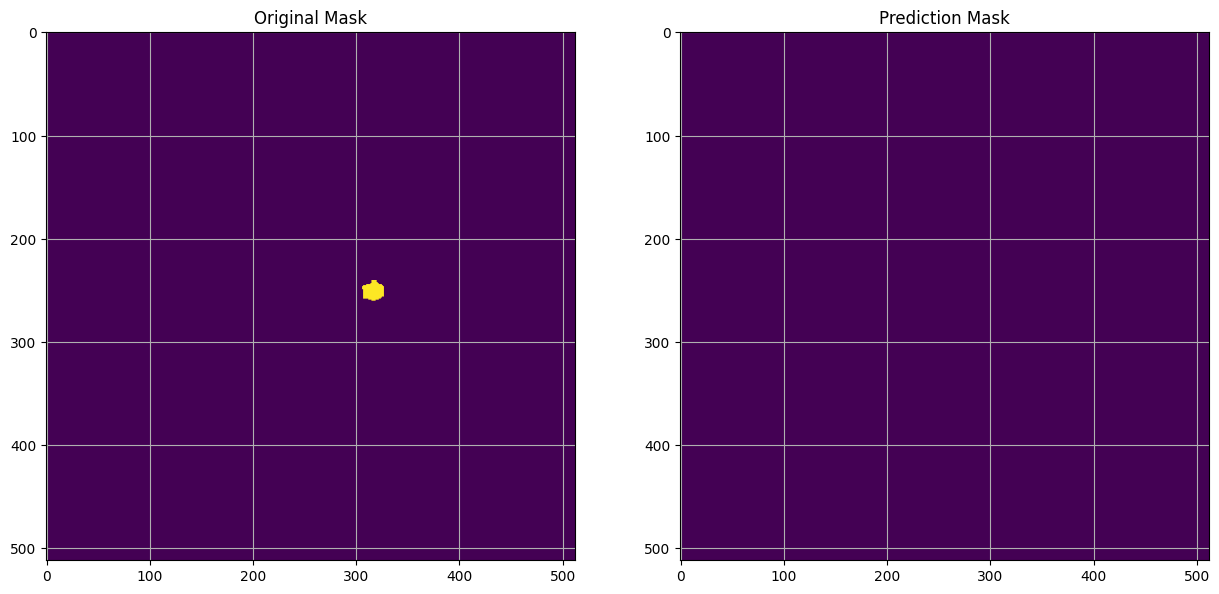

DICE COEFFICIENT IS 3.2258063475546346e-08
MY DICE COEFFICIENT IS 7.611392732062887e-11
IOU IS 3.2258063475546346e-08


In [14]:
view_img(predict, mask)

In [65]:
torch

<module 'torch' from '/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torch/__init__.py'>

In [51]:
predict.sum()

tensor(1020.2257)

In [54]:
predict

tensor([[7.6396e-05, 7.6686e-05, 7.1254e-05,  ..., 7.4787e-05, 9.4663e-05,
         6.3159e-05],
        [7.8946e-05, 8.1808e-05, 7.7624e-05,  ..., 7.7501e-05, 9.9823e-05,
         4.8354e-05],
        [7.5250e-05, 8.2277e-05, 8.0477e-05,  ..., 7.2782e-05, 9.2923e-05,
         4.5505e-05],
        ...,
        [6.5591e-05, 6.6887e-05, 5.8088e-05,  ..., 1.2479e-04, 1.0186e-04,
         1.5028e-04],
        [8.5441e-05, 9.6792e-05, 8.6790e-05,  ..., 1.0744e-04, 9.2301e-05,
         1.5220e-04],
        [5.8959e-05, 5.0072e-05, 5.0726e-05,  ..., 1.3233e-04, 1.3239e-04,
         1.6712e-04]])

In [60]:
torch.histc(predict)

tensor([2.6084e+05, 8.7000e+01, 4.0000e+01, 2.7000e+01, 1.0000e+01, 1.4000e+01,
        9.0000e+00, 5.0000e+00, 5.0000e+00, 1.0000e+01, 8.0000e+00, 1.0000e+01,
        6.0000e+00, 1.0000e+00, 8.0000e+00, 3.0000e+00, 1.0000e+00, 2.0000e+00,
        4.0000e+00, 2.0000e+00, 2.0000e+00, 5.0000e+00, 5.0000e+00, 3.0000e+00,
        1.0000e+00, 0.0000e+00, 5.0000e+00, 2.0000e+00, 1.0000e+00, 6.0000e+00,
        3.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00,
        2.0000e+00, 1.0000e+00, 5.0000e+00, 3.0000e+00, 4.0000e+00, 1.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 3.0000e+00, 2.0000e+00,
        2.0000e+00, 0.0000e+00, 4.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00,
        0.0000e+00, 2.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 1.0000e+00, 5.0000e+00, 3.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 5.0000e+00,
        2.0000e+00, 2.0000e+00, 1.0000e+

In [53]:
torch.sigmoid(predict).sum()

tensor(131310.0469)

In [ ]:
torch.sigmoid(output).view(-1).data.cpu().numpy()

In [49]:
dice

NameError: name 'dice' is not defined

In [2]:
x = torch.tensor([0.5, 1, 0])
y = torch.tensor([0, 1, 0])

In [6]:
dice_coef(x,y)

0.5123927960134477

In [7]:
iou_score(x,y)

0.5000024999875001

In [4]:
np_array = np.zeros((6,1,512,512))

In [6]:
np_array.shape

(6, 1, 512, 512)

In [7]:
type(np_array)

numpy.ndarray

In [9]:
np_array[0,:,:,:].shape

(1, 512, 512)

In [11]:
np.squeeze(np_array, axis=1).shape

(6, 512, 512)

In [12]:
np_array.shape

(6, 1, 512, 512)